In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

ModuleNotFoundError: No module named 'xgboost'

In [3]:
df0 = pd.read_csv(r"C:\Users\mukeshkr\Downloads\HR_comma_sep.csv")

In [4]:
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df0.shape

(14999, 10)

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* There are 14999 rows and 10 columns in the dataset. 
- There are two float variables, `satisfaction_level` and `last_evaluation`, and two categorical variables, `department` and `salary`. Other variables have integer data type.

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'Department':'department', 'average_montly_hours': 'average_monthly_hours'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
df0.duplicated().sum()

3008

- There is 3008 duplicated values which is 20% of the entire dataset. It is not likely that two employes give the same answers for every question. These duplicates are most likely not meaningful, therefore it will be removed from the dataset.

In [11]:
df = df0.drop_duplicates(keep='first')

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


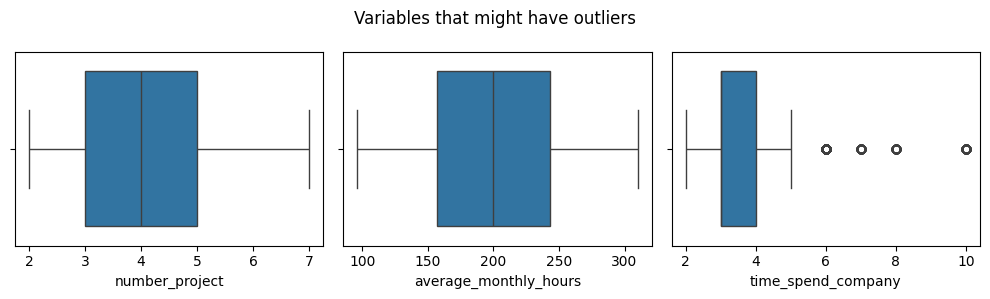

In [15]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,3)
fig.suptitle('Variables that might have outliers')
sns.boxplot(x=df['number_project'], ax=axes[0])
sns.boxplot(x=df['average_monthly_hours'], ax=axes[1])
sns.boxplot(x=df['time_spend_company'], ax=axes[2])
plt.tight_layout()

- `time_spend_company` seems to have some outliers.

In [16]:
q1 = np.percentile(df['time_spend_company'], 25)
q2 = np.percentile(df['time_spend_company'], 50)
q3 = np.percentile(df['time_spend_company'], 75)
IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

print('upper limit:', upper_limit)
print('lower limit:', lower_limit)
outliers = df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)]

print('There are {} rows contains outliers in the time_spend_company column.'.format(len(outliers)))

upper limit: 5.5
lower limit: 1.5
There are 824 rows contains outliers in the time_spend_company column.


In [17]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
print(df['left'].value_counts())
print()
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


- Approximately 83% of the employees in the dataset have chosen to leave the company, totaling 1,991 individuals, while the remaining 17% consisting of 10,000 employees have stayed. This distribution indicates a notable class imbalance.

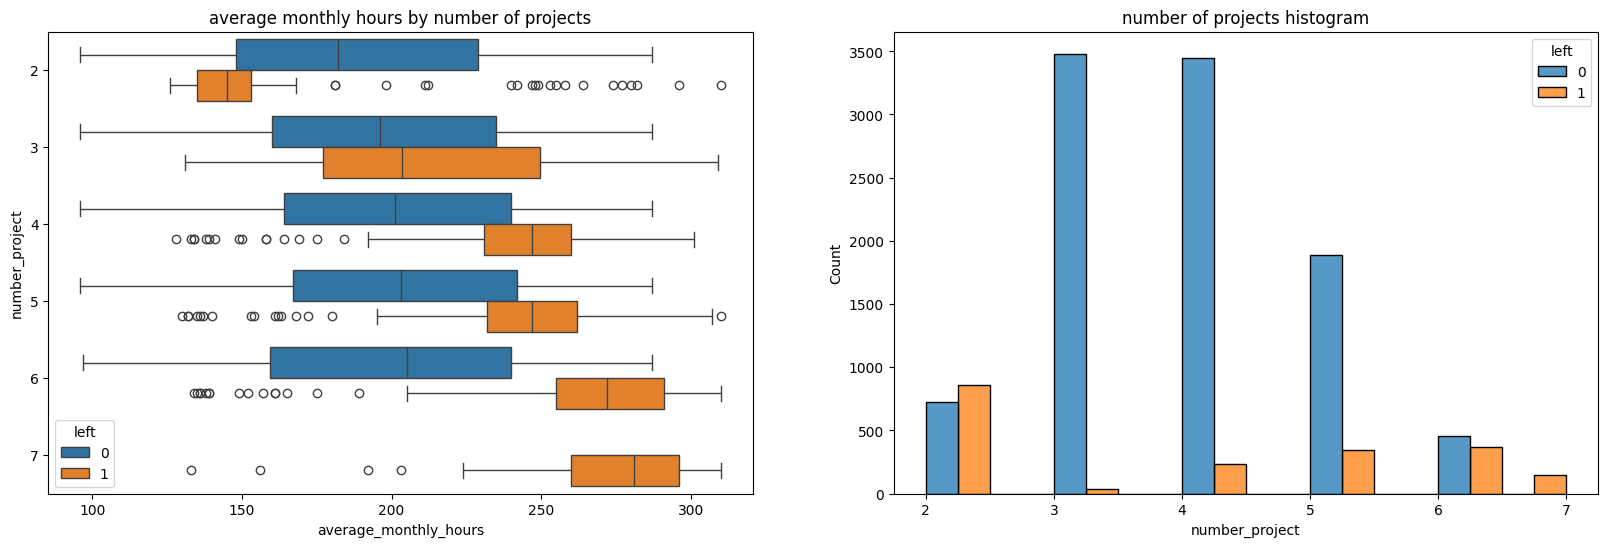

In [20]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1,2)
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient="h", ax=ax[0])
ax[0].set_title('average monthly hours by number of projects')

sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', binwidth=0.5, ax=ax[1])
ax[1].set_title('number of projects histogram')
plt.show()

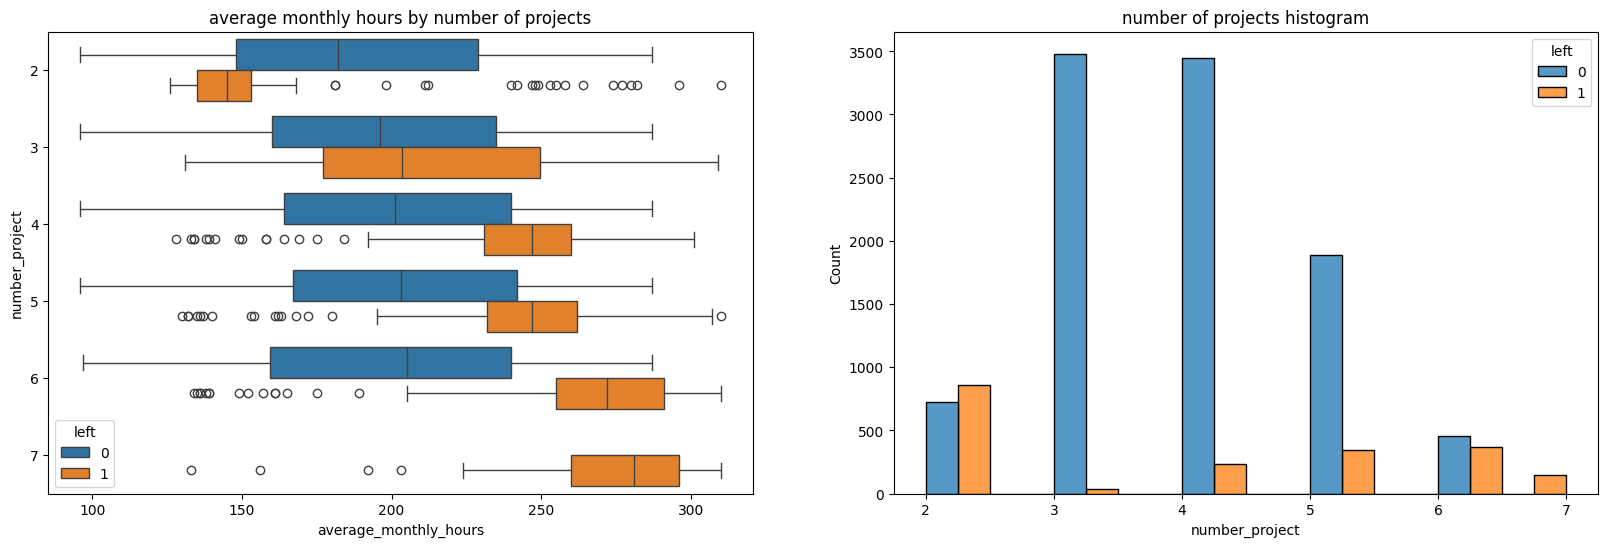

In [21]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1,2)
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient="h", ax=ax[0])
ax[0].set_title('average monthly hours by number of projects')

sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', binwidth=0.5, ax=ax[1])
ax[1].set_title('number of projects histogram')
plt.show()

- Everyone with seven projects left the company. Employees who had seven or six projects and left the company worked more number of hours (approximately 260-280 hours/month) than any other group. 
- Other than the employees worked more hours, the highest group of employees that left the company was the ones that had only two projects and worked a lot less compared to other groups. Even employees who had two projects and stayed in the company worked more hours on average. 
- This might mean that the company is not very succesfull to keep its newer employees and fails maintain engagement and satisfaction.
- Employees who had three, four or five projects demonstared a trend to stay in the company. These group of people worked approximately 200 hours per month on average. 

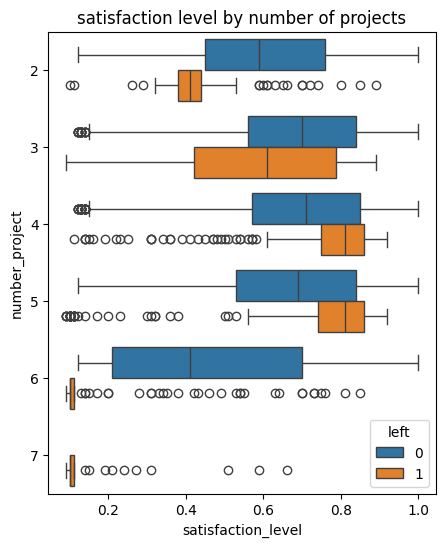

In [22]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df, x='satisfaction_level', y='number_project', orient='h', hue='left')
plt.title('satisfaction level by number of projects')
plt.show()

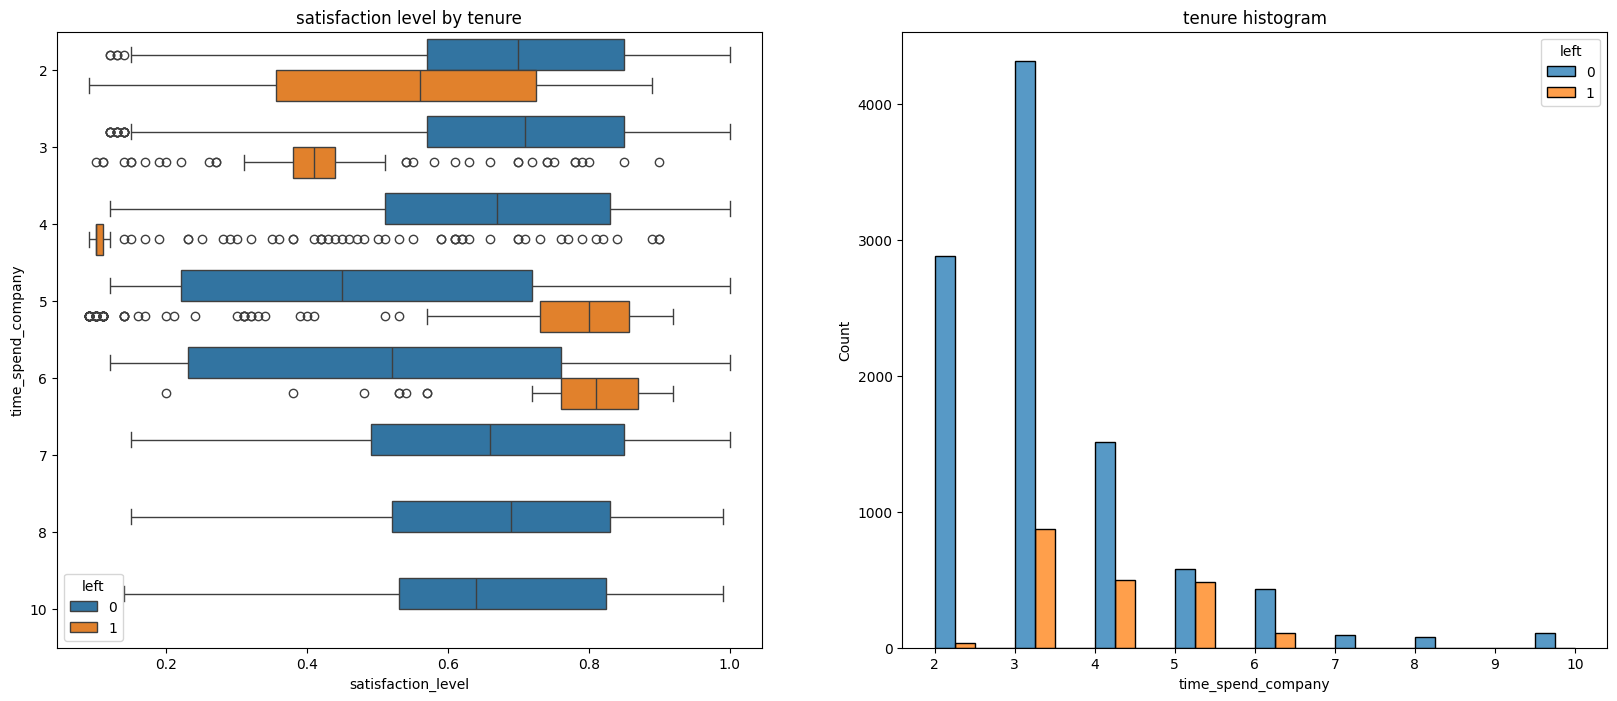

In [23]:
fig = plt.figure(figsize=(20,8))
axes = fig.subplots(1,2)

sns.histplot(data=df, x='time_spend_company',hue='left', multiple='dodge', binwidth=0.5, ax=axes[1])
sns.boxplot(data=df, x='satisfaction_level', y='time_spend_company', orient='h', hue='left', ax=axes[0])

axes[0].set_title('satisfaction level by tenure')
axes[1].set_title('tenure histogram')
plt.show()

- The people who left company in their fourth year demonstrated low level of satisfaction, lowest compared to other groups. Employees who left in their fifth and sixth year demonstrated high levels of satisfaction, we can assume that there is an another reason for them to leave. In the meantime, employees in the same group who have chosen to stay demonstrated lower satisfaction levels compared to those left. 
- The number of employees decreases as the tenure increases. This is because the company's low employee retention rate. Most of the employees are in their second and third year.

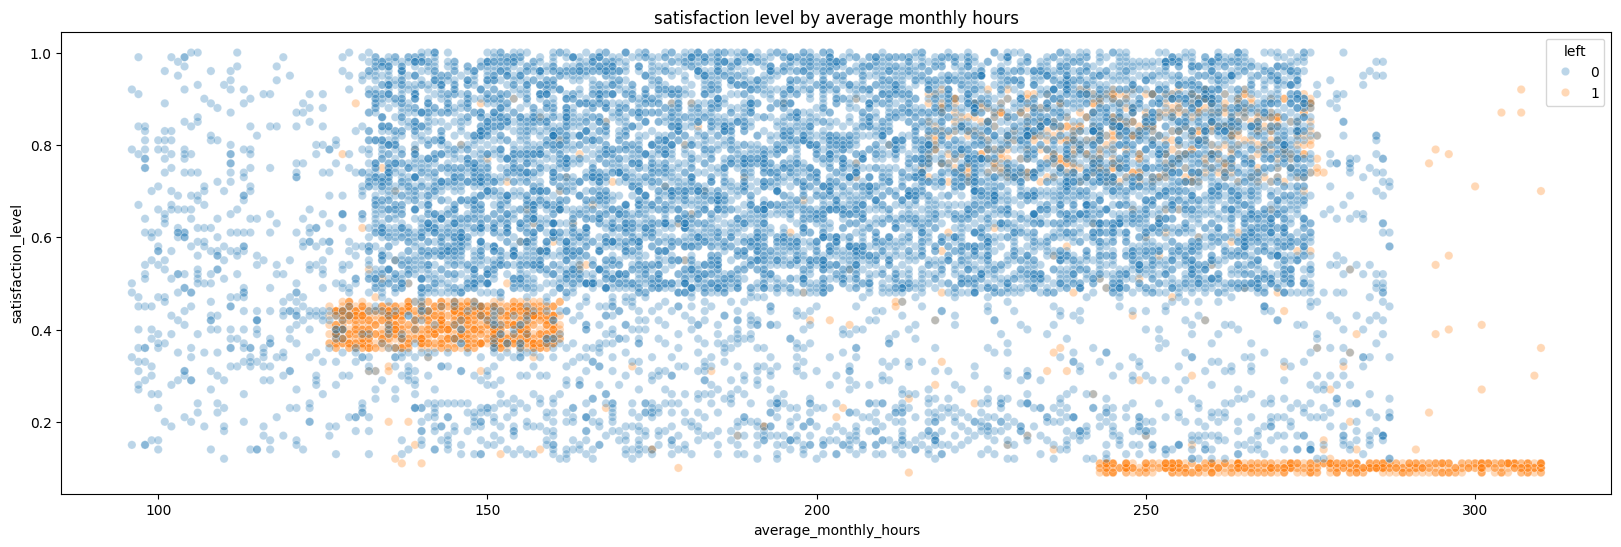

In [24]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3)
plt.title('satisfaction level by average monthly hours')
plt.show()

- The preciding scatter plot demonstrates three groups of employees left the company, the ones that worked fewer hours monthly and had low satisfaction levels, the ones that worked more hours (appoximately 250-300 hours/month) and had the lowest satisfaction levels, and finally the ones worked 220-270 hours and had high level of satisfaction.

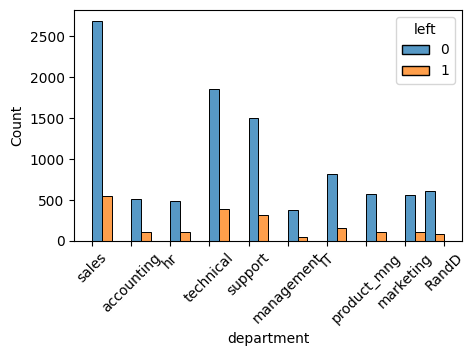

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='department', hue='left', multiple='dodge', discrete=False)
plt.xticks(rotation=45)
plt.show()

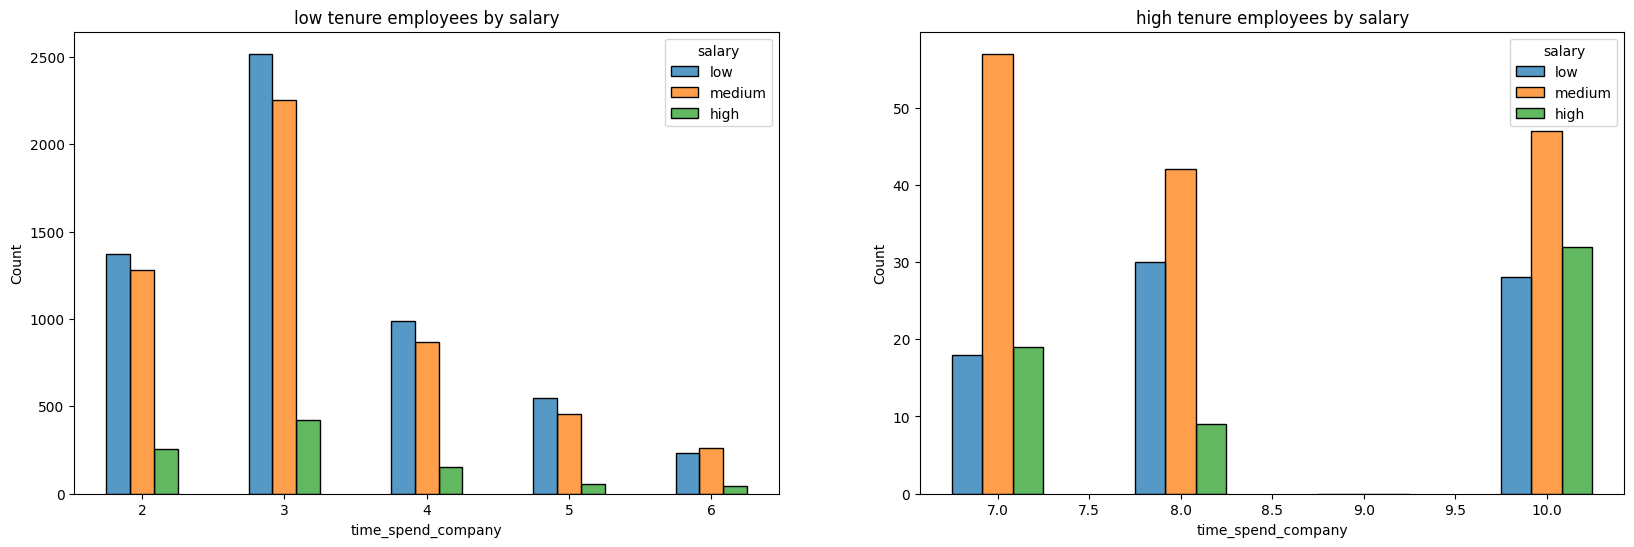

In [26]:
low_tenure = df[df['time_spend_company']<=6]
high_tenure = df[df['time_spend_company']>6]

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,2)

sns.histplot(data=low_tenure, x='time_spend_company', hue='salary', multiple='dodge', discrete=1, shrink=.5, ax=axes[0])
sns.histplot(data=high_tenure, x='time_spend_company', hue='salary', multiple='dodge', discrete=1, shrink=.5, ax=axes[1], hue_order=['low','medium','high'])

axes[0].set_title('low tenure employees by salary')
axes[1].set_title('high tenure employees by salary')
plt.show()

The preceding visualization highlights a disparity in salary distribution, particularly among employees with extensive tenure. The graph illustrates an imbalance that may warrant further investigation or consideration within the high-tenure employee group.

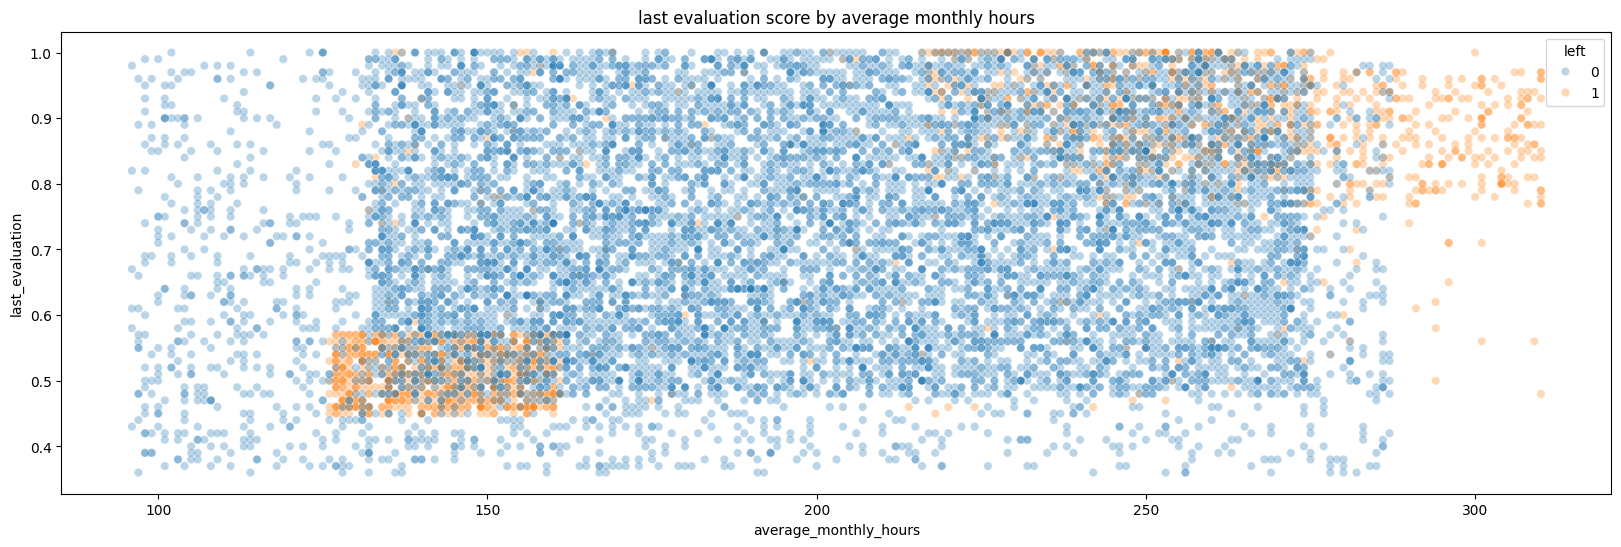

In [27]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3)
plt.title('last evaluation score by average monthly hours')
plt.show()

- The preciding scatter plots shows two group of employees who left the company. First group worked 230-300 hours/month and had high last evaluation score. On the other hand second group worked 130-160 hours/month and had lower evaluation scores.
- Analyzing these patterns, it becomes evident that the first group, requiring 230-300 hours/month and boasting high evaluation scores, might pose a higher cost to the company compared to the second group. This insight prompts a closer examination of the factors contributing to these variations in both working hours and evaluation scores.

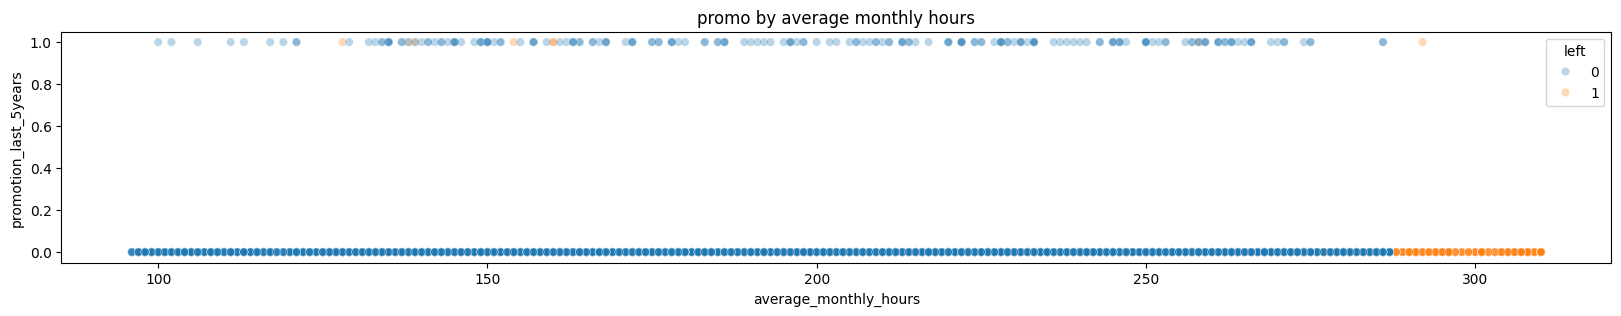

In [28]:
plt.figure(figsize=(20,3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.3)
plt.title('promo by average monthly hours')
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
